In [2]:
import pandas as pd

data=pd.read_csv('C:\\Users\\yashp\\OneDrive\\Desktop\\SENTIMENTAL ANALYSIS\\smartphones.csv')

print("OUR BEST PICKS!")
filtered_data = data[data['avg_rating'] > 8.8]

# Extract and print the 'brand_name' and 'model' for the filtered data
for index, row in filtered_data.iterrows():
    brand = row['brand_name']
    model = row['model']
    print(f"Brand: {brand}, Model: {model}")
 


OUR BEST PICKS!
Brand: google, Model: Google Pixel 6 Pro
Brand: huawei, Model: Huawei Mate Xs 2
Brand: infinix, Model: Infinix Zero Ultra
Brand: iqoo, Model: iQOO 11 (16GB RAM + 256GB)
Brand: iqoo, Model: iQOO 11 Pro 5G
Brand: leitz, Model: Leitz Phone 2
Brand: lenovo, Model: Lenovo Legion Pro 2
Brand: lg, Model: LG Wing 5G
Brand: motorola, Model: Motorola Edge 30 Pro 5G
Brand: motorola, Model: Motorola Edge 40 Pro 5G
Brand: motorola, Model: Motorola Edge Plus
Brand: motorola, Model: Motorola Moto X40
Brand: motorola, Model: Motorola ThinkPhone
Brand: oneplus, Model: OnePlus 10 Pro 5G
Brand: oneplus, Model: OnePlus 11 5G
Brand: oneplus, Model: OnePlus 9 Pro
Brand: oppo, Model: Oppo Find X6
Brand: realme, Model: Realme GT 2 Pro 5G
Brand: realme, Model: Realme GT 2 Pro 5G (12GB RAM + 256GB)
Brand: samsung, Model: Samsung Galaxy A53 (8GB RAM + 256GB)
Brand: samsung, Model: Samsung Galaxy A53 5G (8GB RAM + 128GB)
Brand: samsung, Model: Samsung Galaxy Note 10 Plus
Brand: samsung, Model: Sam

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\yashp\\OneDrive\\Desktop\\SENTIMENTAL ANALYSIS\\20191226-reviews.csv")  # Replace 'your_dataset.csv' with the actual dataset file name

# Data cleaning (e.g., removing punctuation and converting to lowercase)
df['title'] = df['title'].str.lower()
df['body'] = df['body'].str.lower()


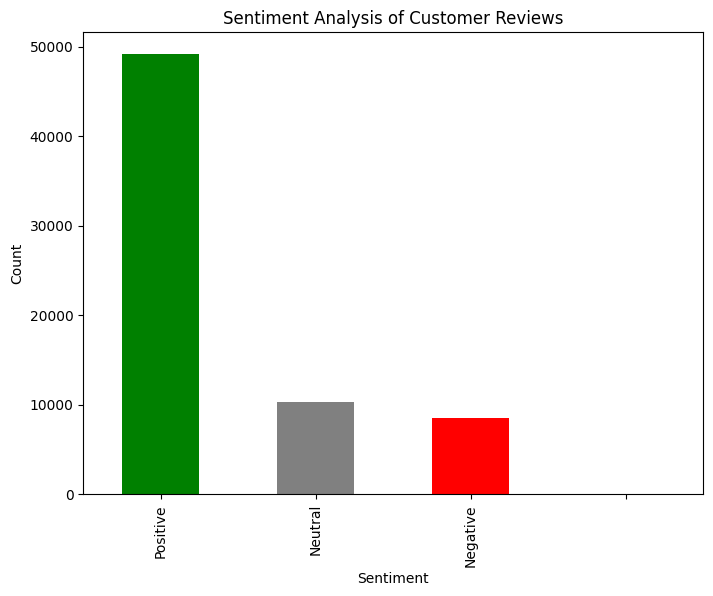

Number of positive reviews: 49139
Number of negative reviews: 8543
Number of neutral reviews: 10283


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the dataset
reviews_df = pd.read_csv('C:\\Users\\yashp\\OneDrive\\Desktop\\SENTIMENTAL ANALYSIS\\20191226-reviews.csv')

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    if isinstance(review, float):
        return "", 0.0, 0.0
    analysis = TextBlob(str(review))
    sentiment = analysis.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity

    if polarity > 0:
        sentiment_label = 'Positive'
    elif polarity == 0:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'

    return sentiment_label, polarity, subjectivity

# Apply sentiment analysis and store polarity and subjectivity
reviews_df['Sentiment'], reviews_df['Polarity'], reviews_df['Subjectivity'] = zip(*reviews_df['body'].apply(analyze_sentiment))

# Visualize the distribution of sentiments
sentiment_counts = reviews_df['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])
plt.title('Sentiment Analysis of Customer Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Additional analysis and printing
positive_reviews = reviews_df[reviews_df['Sentiment'] == 'Positive']
negative_reviews = reviews_df[reviews_df['Sentiment'] == 'Negative']
neutral_reviews = reviews_df[reviews_df['Sentiment'] == 'Neutral']

print("Number of positive reviews:", len(positive_reviews))
print("Number of negative reviews:", len(negative_reviews))
print("Number of neutral reviews:", len(neutral_reviews))

# You can add more analysis or print additional information as needed.


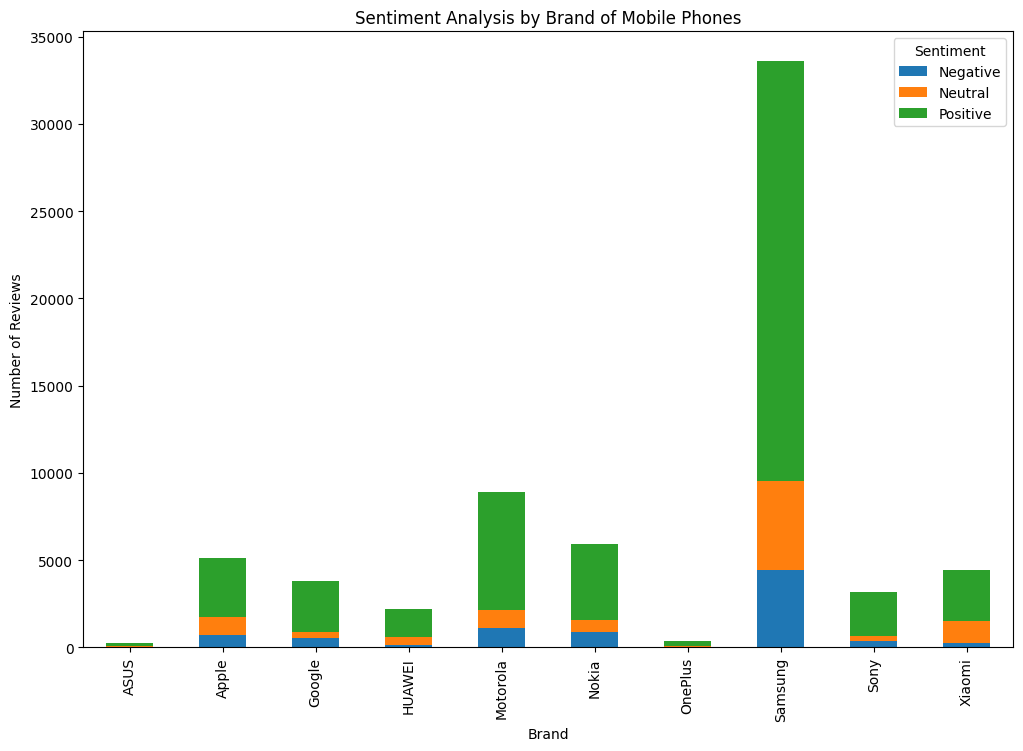

Sentiment  Negative  Neutral  Positive  Total
brand                                        
ASUS             34       19       198    251
Apple           724     1044      3377   5145
Google          554      329      2904   3787
HUAWEI          161      440      1624   2225
Motorola       1087     1051      6742   8880
Nokia           855      727      4333   5915
OnePlus          28       38       281    347
Samsung        4451     5102     24076  33629
Sony            370      300      2526   3196
Xiaomi          257     1233      2921   4411


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

# Load the sentiment analysis dataset
sentimental_dataset = pd.read_csv('C:\\Users\\yashp\\OneDrive\\Desktop\\SENTIMENTAL ANALYSIS\\20191226-reviews.csv')

# Load the mobile phone dataset
mobile_dataset = pd.read_csv("C:\\Users\\yashp\\OneDrive\\Desktop\\SENTIMENTAL ANALYSIS\\20191226-items.csv")

# Merge the datasets on the common "ASIN" column
merged_dataset = sentimental_dataset.merge(mobile_dataset, on='asin', how='inner')

# Define a function to analyze sentiment using TextBlob
def analyze_sentiment(review):
    if isinstance(review, float) or pd.isnull(review):
        return 'Neutral'
    analysis = TextBlob(str(review))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to reviews and create a "Sentiment" column
merged_dataset['Sentiment'] = merged_dataset['body'].apply(analyze_sentiment)

# Group by brand and sentiment, and count the number of reviews
sentiment_distribution = merged_dataset.groupby(['brand', 'Sentiment'])['asin'].count().unstack().fillna(0)

# Create a stacked bar chart
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Analysis by Brand of Mobile Phones')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.show()

# Calculate and print the count of positive, negative, and neutral sentiments for each brand
sentiment_counts_by_brand = merged_dataset.groupby(['brand', 'Sentiment'])['asin'].count().unstack().fillna(0)
sentiment_counts_by_brand['Total'] = sentiment_counts_by_brand.sum(axis=1)

print(sentiment_counts_by_brand)
